In [ ]:
# Pandas is for data structures
import pandas as pd
# statsmodels contain modules for regression and time series analysis
import statsmodels.api as sm
# statsmodels.formula accepts R-style string formula and no need to add new columns to the dataset.
import statsmodels.formula.api as smf
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib is a plotting package
import matplotlib.pyplot as plt
# matplotlib Showing the plot right after the current code  
%matplotlib inline
# scatter plot matrix
import seaborn as sns
import scipy.stats as stats

In [ ]:
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Internally Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');

## Q1: Data Cleaning

In [ ]:
# Impport data
df = pd.read_excel('pharmacy profit.xlsx')
df.tail()

In [ ]:
############## Complete the code below ##############
# Step 1: Drop unwanted data
# Task 1: Drop the 'Location' columns from df
# Command: df.drop(columns="")
# Replace $fill your code$ by the correct coding
df_1 = df.drop(columns=$fill your code$)

# Task 2: Drop the row of data of the new store (last row) from df_1
# Command: df_1.drop(index=)
# Replace $fill your code$ by the correct coding
df_p = df_1.drop(index=$fill your code$)

############## End of your code ##############

N = df_p.shape
print(N)

## Q2: Initial model

In [ ]:
# Set up initial model 
# Specify the dependent variable and independent variables
X = df_p.drop(columns="Profit")
Y = df_p['Profit']

# Fit multiple regression model and show summary of fit 
model_fit1 = sm.OLS(Y,sm.add_constant(X)).fit()
print(model_fit1.summary())

## Q2a: Generate four-in-one residual plot

In [ ]:
############## Complete the code below ##############
# Task 1: Generate the four-in-one residual plot for initial model
# Command: four_in_one(dataframe, model)
# Replace $fill your code$ by the correct coding
four_in_one($fill your code$)

############## End of your code ##############

## Q2b: Answer (Double-click $here$ to type your answer below):


## Q3a: Model
In this model, you are required to drop the 'Income' predictor from the initial model.

In [ ]:
############## Complete the code below ##############
# Reduced model
# Task 1: Drop the 'Income' from predictors.
# Command: df_p.drop(columns="")
# Replace $fill your code$ by the correct coding
# You should drop both "Income" and "Profit" for X_1
X_1 = df_p.drop(columns=$fill your code$)
Y_1 = df_p[$fill your code$]

# Task 2: Bulid up the model
# Command: sm.OLS(Y,sm.add_constant(X)).fit()
# Notice that you need to change the input name of X and Y 
model = sm.OLS(Y,sm.add_constant(X)).fit()

############## End of your code ##############

print(model.summary())

## Q3b: Answer (Double-click $here$ to type your answer below):


## Q4: VIF

VIF on slide 22:
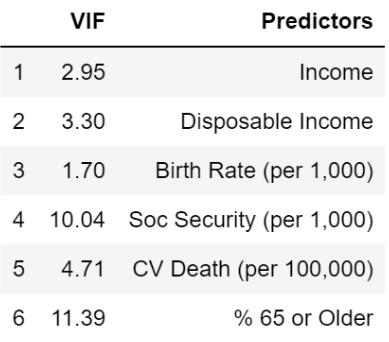

The coding for variance inflation factor (VIF) of the final model on Slide 23 of the lecture notes is given below. Please run it to obtain VIFs and answer the question

In [ ]:
# Run the code to calculate VIF of final model on slide 23
from statsmodels.stats.outliers_influence import variance_inflation_factor

Final_X = df_p[["Disposable Income","Birth Rate (per 1,000)","% 65 or Older"]]
vif = pd.DataFrame()
Final_X = sm.add_constant(Final_X)
vif["VIF"] = [variance_inflation_factor(Final_X.values, i) for i in range(Final_X.shape[1])]
vif["Predictors"] = Final_X.columns
vif.drop(index = 0).round(2) 

## Answer (Double-click $here$ to type your answer below):
